In [68]:
from __future__ import division, print_function
import datetime
import yfinance as yf
import pandas as pd
import numpy as np
import six
from sklearn import linear_model

import numpy.random
import scipy.special
from builtins import zip, range
import copy

In [ ]:
startDate = datetime.date(2015,4,1)
endDate = datetime.date(2024,10,1)

In [ ]:
## Dow Jones Indutrial Average Index Composition
DJI  = {
          datetime.date(2015,4,1) : {
                                      "x1": "MMM",  # 3M Company
                                      "x2": "GE",   # General Electric Company
                                      "x3": "NKE",  # Nike, Inc.
                                      "x4": "AXP",  # American Express Company
                                      "x5": "GS",   # The Goldman Sachs Group, Inc.
                                      "x6": "PFE",  # Pfizer Inc.
                                      "x7": "AAPL", # Apple Inc.
                                      "x8": "HD",   # The Home Depot, Inc.
                                      "x9": "PG",   # The Procter & Gamble Company
                                      "x10": "BA",  # The Boeing Company
                                      "x11": "INTC",# Intel Corporation
                                      "x12": "TRV", # The Travelers Companies, Inc.
                                      "x13": "CAT", # Caterpillar Inc.
                                      "x14": "IBM", # International Business Machines Corporation
                                      "x15": "UNH", # UnitedHealth Group Inc.
                                      "x16": "CVX", # Chevron Corporation
                                      "x17": "JNJ", # Johnson & Johnson
                                      "x18": "DIS",  # The Walt Disney Company
                                      "x19": "CSCO",# Cisco Systems, Inc.
                                      "x20": "JPM", # JPMorgan Chase & Co.
                                      "x21": "VZ",  # Verizon Communications Inc.
                                      "x22": "KO",  # The Coca-Cola Company
                                      "x23": "MCD", # McDonald's Corporation
                                      "x24": "V",   # Visa Inc.
                                      "x25": "DD",  # E.I. du Pont de Nemours & Company
                                      "x26": "MRK", # Merck & Co., Inc.
                                      "x27": "WMT", # Wal-Mart Stores, Inc.
                                      "x28": "XOM", # Exxon Mobil Corporation
                                      "x29": "MSFT",# Microsoft Corporation
                                      "x30": "UTX", # United Technologies Corporation
                                  },

          datetime.date(2017,9,1):{
                                        "x1": "MMM",  # 3M Company
                                        "x2": "GE",   # General Electric Company
                                        "x3": "NKE",  # Nike, Inc.
                                        "x4": "AXP",  # American Express Company
                                        "x5": "GS",   # The Goldman Sachs Group, Inc.
                                        "x6": "PFE",  # Pfizer Inc.
                                        "x7": "AAPL", # Apple Inc.
                                        "x8": "HD",   # The Home Depot, Inc.
                                        "x9": "PG",   # The Procter & Gamble Company
                                        "x10": "BA",  # The Boeing Company
                                        "x11": "INTC",# Intel Corporation
                                        "x12": "TRV", # The Travelers Companies, Inc.
                                        "x13": "CAT", # Caterpillar Inc.
                                        "x14": "IBM", # International Business Machines Corporation
                                        "x15": "UNH", # UnitedHealth Group Inc.
                                        "x16": "CVX", # Chevron Corporation
                                        "x17": "JNJ", # Johnson & Johnson
                                        "x18": "DIS",  # The Walt Disney Company
                                        "x19": "CSCO",# Cisco Systems, Inc.
                                        "x20": "JPM", # JPMorgan Chase & Co.
                                        "x21": "VZ",  # Verizon Communications Inc.
                                        "x22": "KO",  # The Coca-Cola Company
                                        "x23": "MCD", # McDonald's Corporation
                                        "x24": "V",   # Visa Inc.
                                        "x25": "DWDP",# DowDuPont Inc. (formerly E.I. du Pont de Nemours & Company)
                                        "x26": "MRK", # Merck & Co., Inc.
                                        "x27": "WMT", # Wal-Mart Stores, Inc.
                                        "x28": "XOM", # Exxon Mobil Corporation
                                        "x29": "MSFT",# Microsoft Corporation
                                        "x30": "UTX", # United Technologies Corporation
                                     },

          datetime.date(2018,6,26): {
                                      'x1': 'MMM',                # 3M Company
                                      'x2': 'GS',                 # The Goldman Sachs Group, Inc.
                                      'x3': 'PFE',                # Pfizer Inc.
                                      'x4': 'AXP',                # American Express Company
                                      'x5': 'HD',                 # The Home Depot, Inc.
                                      'x6': 'PG',                 # The Procter & Gamble Company
                                      'x7': 'AAPL',               # Apple Inc.
                                      'x8': 'INTC',               # Intel Corporation
                                      'x9': 'TRV',                # The Travelers Companies, Inc.
                                      'x10': 'BA',                # The Boeing Company
                                      'x11': 'IBM',               # International Business Machines Corporation
                                      'x12': 'UNH',               # UnitedHealth Group Incorporated
                                      'x13': 'CAT',               # Caterpillar Inc.
                                      'x14': 'JNJ',               # Johnson & Johnson
                                      'x15': 'DIS',                # The Walt Disney Company
                                      'x16': 'CVX',               # Chevron Corporation
                                      'x17': 'JPM',               # JPMorgan Chase & Co.
                                      'x18': 'VZ',                # Verizon Communications Inc.
                                      'x19': 'CSCO',              # Cisco Systems, Inc.
                                      'x20': 'MCD',               # McDonald's Corporation
                                      'x21': 'V',                 # Visa Inc.
                                      'x22': 'KO',                # The Coca-Cola Company
                                      'x23': 'MRK',               # Merck & Co., Inc.
                                      'x24': 'WBA',               # Walgreens Boots Alliance, Inc.
                                      'x25': 'DWDP',              # DowDuPont Inc.
                                      'x26': 'MSFT',              # Microsoft Corporation
                                      'x27': 'WMT',               # Walmart Inc.
                                      'x28': 'XOM',               # Exxon Mobil Corporation
                                      'x29': 'NKE',               # Nike, Inc.
                                      'x30': 'UTX',               # United Technologies Corporation

                                  },

          datetime.date(2019,4,2): {  'x1':'MMM',                #3M Company
                                      'x2':'GS',                 #The Goldman Sachs Group, Inc.
                                      'x3':'PFE',                #Pfizer Inc.
                                      'x4':'AXP',                #American Express Company
                                      'x5':'HD',                 #The Home Depot, Inc.
                                      'x6':'PG',                 #The Procter & Gamble Company
                                      'x7':'AAPL',               #Apple Inc.
                                      'x8':'INTC',               #Intel Corporation
                                      'x9':'TRV',                #The Travelers Companies, Inc.
                                      'x10':'BA',                #The Boeing Company
                                      'x11':'IBM',               #International Business Machines Corporation
                                      'x12':'UNH',               #UnitedHealth Group Incorporated
                                      'x13':'CAT',               #Caterpillar Inc.
                                      'x14':'JNJ',               #Johnson & Johnson
                                      'x15':'DIS',                #The Walt Disney Company
                                      'x16':'CVX',               #Chevron Corporation
                                      'x17':'JPM',               #JPMorgan Chase & Co.
                                      'x18':'VZ',                #Verizon Communications Inc.
                                      'x19':'CSCO',              #Cisco Systems, Inc.
                                      'x20':'MCD',               #McDonald's Corporation
                                      'x21':'V',                 #Visa Inc.
                                      'x22':'KO',                #The Coca-Cola Company
                                      'x23':'MRK',               #Merck & Co., Inc.
                                      'x24':'WBA',               #Walgreens Boots Alliance, Inc.
                                      'x25':'DOW',               #Dow Inc.
                                      'x26':'MSFT',              #Microsoft Corporation
                                      'x27':'WMT',               #Walmart Inc.
                                      'x28':'XOM',               #Exxon Mobil Corporation
                                      'x29':'NKE',               #Nike, Inc.
                                      'x30':'UTX',               #United Technologies Corporation
                                  },

          datetime.date(2020,4,6) :  {
                                      'x1':'MMM',                #3M Company
                                      'x2':'GS',                 #The Goldman Sachs Group, Inc.
                                      'x3':'PFE',                #Pfizer Inc.
                                      'x4':'AXP',                #American Express Company
                                      'x5':'HD',                 #The Home Depot, Inc.
                                      'x6':'PG',                 #The Procter & Gamble Company
                                      'x7':'AAPL',               #Apple Inc.
                                      'x8':'INTC',               #Intel Corporation
                                      'x9':'RTX',                #Raytheon Technologies Corporation
                                      'x10':'BA',                #The Boeing Company
                                      'x11':'IBM',               #International Business Machines Corporation
                                      'x12':'TRV',               #The Travelers Companies, Inc.
                                      'x13':'CAT',               #Caterpillar Inc.
                                      'x14':'JNJ',               #Johnson & Johnson
                                      'x15':'UNH',               #UnitedHealth Group Incorporated
                                      'x16':'CVX',               #Chevron Corporation
                                      'x17':'JPM',               #JPMorgan Chase & Co.
                                      'x18':'VZ',                #Verizon Communications Inc.
                                      'x19':'CSCO',              #Cisco Systems, Inc.
                                      'x20':'MCD',               #McDonald's Corporation
                                      'x21':'V',                 #Visa Inc.
                                      'x22':'KO',                #The Coca-Cola Company
                                      'x23':'MRK',               #Merck & Co., Inc.
                                      'x24':'WBA',               #Walgreens Boots Alliance, Inc.
                                      'x25':'DOW',               #Dow Inc.
                                      'x26':'MSFT',              #Microsoft Corporation
                                      'x27':'WMT',               #Walmart Inc.
                                      'x28':'XOM',               #Exxon Mobil Corporation
                                      'x29':'NKE',               #Nike, Inc.
                                      'x30':'DIS'                #The Walt Disney Company
                                       },

          datetime.date(2020,8,31): {
                                      'x1':'MMM',                #3M Company
                                      'x2':'GS',                 #The Goldman Sachs Group, Inc.
                                      'x3':'NKE',                #Nike, Inc.
                                      'x4':'AXP',                #American Express Company
                                      'x5':'HD',                 #The Home Depot, Inc.
                                      'x6':'PG',                 #The Procter & Gamble Company
                                      'x7':'AMGN',               #Amgen Inc.
                                      'x8':'HON',                #Honeywell International Inc.
                                      'x9':'CRM',                #Salesforce, Inc.
                                      'x10':'AAPL',              #Apple Inc.
                                      'x11':'INTC',              #Intel Corporation
                                      'x12':'TRV',               #The Travelers Companies, Inc.
                                      'x13':'BA',                #The Boeing Company
                                      'x14':'IBM',               #International Business Machines Corporation
                                      'x15':'UNH',               #UnitedHealth Group Incorporated
                                      'x16':'CAT',               #Caterpillar Inc.
                                      'x17':'JNJ',               #Johnson & Johnson
                                      'x18':'VZ',                #Verizon Communications Inc.
                                      'x19':'CVX',               #Chevron Corporation
                                      'x20':'JPM',               #JPMorgan Chase & Co.
                                      'x21':'V',                 #Visa Inc.
                                      'x22':'CSCO',              #Cisco Systems, Inc.
                                      'x23':'MCD',               #McDonald's Corporation
                                      'x24':'WBA',               #Walgreens Boots Alliance, Inc.
                                      'x25':'KO',                #The Coca-Cola Company
                                      'x26':'MRK',               #Merck & Co., Inc.
                                      'x27':'WMT',               #Walmart Inc.
                                      'x28':'DOW',               #Dow Inc.
                                      'x29':'MSFT',              #Microsoft Corporation
                                      'x30':'DIS'                #The Walt Disney Company
                                     },

          datetime.date(2024,2,26) : {
                                      'x1':'MMM',                #3M Company
                                      'x2':'DOW',                #Dow Inc.
                                      'x3':'MSFT',               #Microsoft Corporation
                                      'x4':'AMZN',               #Amazon.com, Inc.
                                      'x5':'GS',                 #The Goldman Sachs Group, Inc.
                                      'x6':'NKE',                #Nike, Inc.
                                      'x7':'AXP',                #American Express Company
                                      'x8':'HD',                 #The Home Depot, Inc.
                                      'x9':'PG',                 #The Procter & Gamble Company
                                      'x10':'AMGN',              #Amgen Inc.
                                      'x11':'HON',               #Honeywell International Inc.
                                      'x12':'CRM',               #Salesforce, Inc.
                                      'x13':'AAPL',              #Apple Inc.
                                      'x14':'INTC',              #Intel Corporation
                                      'x15':'TRV',               #The Travelers Companies, Inc.
                                      'x16':'BA',                #The Boeing Company
                                      'x17':'IBM',               #International Business Machines Corporation
                                      'x18':'UNH',               #UnitedHealth Group Incorporated
                                      'x19':'CAT',               #Caterpillar Inc.
                                      'x20':'JNJ',               #Johnson & Johnson
                                      'x21':'VZ',                #Verizon Communications Inc.
                                      'x22':'CVX',               #Chevron Corporation
                                      'x23':'JPM',               #JPMorgan Chase & Co.
                                      'x24':'V',                 #Visa Inc.
                                      'x25':'CSCO',              #Cisco Systems, Inc.
                                      'x26':'MCD',               #McDonald's Corporation
                                      'x27':'WMT',               #Walmart Inc.
                                      'x28':'KO',                #The Coca-Cola Company
                                      'x29':'MRK',               #Merck & Co., Inc.
                                      'x30':'DIS'                #The Walt Disney Company
                                      }
}

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

def loadData( index = 'DJI' ):
  ''' loads initial data '''
  ##url = 'https://raw.githubusercontent.com/amparogg/CapstoneProject_WQU/refs/heads/main/dowjones.csv?token=GHSAT0AAAAAACY7TSTCKL4JGYYQVE2KLIG2ZYT5CBA'
  ##df = pd.read_csv(url,index_col=0)
  df = pd.read_csv('/content/gdrive/MyDrive/WQU Capstone/dowjones.csv', index_col=0)

  ## converting index into datetime
  strIndex = list(df.index)
  dateIndex = []
  for dateString in strIndex:
    dateInd = datetime.datetime.strptime(dateString, '%d-%m-%Y').date()
    dateIndex.append( dateInd )

  df.index = dateIndex
  df.head()
  return df

Mounted at /content/gdrive


In [ ]:
def generateRollPeriodInfoDict( df ):
  ''' generates rollPeriods along with relevant lookback periods '''
  ### finding first business day and last business day of the month
  ### these dates would serve as roll period dates later

  dates = list(df.index)
  dateDf = pd.DataFrame( dates, columns = ['date'] )

  ## convert to datetime (if not already)
  dateDf['date'] = pd.to_datetime( dateDf['date'] )
  dateDf.set_index('date', inplace=True)

  startOfMonth = dateDf.resample('BMS').first()  ## Business Month Start
  endOfMonth = dateDf.resample('BME').first()    ## Business Month End

  dateList =  pd.concat([startOfMonth, endOfMonth]).drop_duplicates().sort_index()
  startEndDates = dateList.index.date.tolist()

  ### rollPeriodDict contains info data for a particular roll period
  ### pre-COVID period, rolling every two month and lookback is 6M
  ### COVID period (post cutoffDate), rolling every month and lookback is 3M

  cutOffDate = datetime.date(2020,2,3)  ### marks the onset of COVID regime

  rollPeriodInfoDict = {}
  preCovidOffset = 12  ## 6 months lookback
  postCovidOffset = 6  ## 3 months lookback

  ## preCovid
  for i in range(12,116,4):
    rollPeriodInfoDict[(startEndDates[i], startEndDates[i+3])] = {'start': startEndDates[i-preCovidOffset], 'end': startEndDates[i-1], 'period' : 'preCovid'}

  ## postCovid
  for i in range(116,len(startEndDates)-1,2):
    rollPeriodInfoDict[(startEndDates[i], startEndDates[i+1])] = {'start': startEndDates[i-postCovidOffset], 'end': startEndDates[i-1], 'period' : 'postCovid'}

  return rollPeriodInfoDict

In [ ]:
def generateRebalDates( index, startDate, endDate ):
  ''' generates the dataframe for the specified startDate and endDate '''
  indexRebalDates = list(DJI.keys())

  def nearestSmallerDate( indexRebalDates, refStartDate ):
    ''' nearest SmallerDate for a given refStartDate among rebalDate '''
    nearestSmallerDate = None
    for date in indexRebalDates:
      if date < refStartDate:
        nearestSmallerDate = date
    return nearestSmallerDate

  baseRebalDate = [nearestSmallerDate( indexRebalDates, startDate )] if nearestSmallerDate( indexRebalDates, startDate ) is not None else []
  rebalDatesInRange = [date for date in indexRebalDates if startDate <= date <= endDate]
  rebalDates =  baseRebalDate + rebalDatesInRange
  return rebalDates


def generateComposition( index, rebalDates, startDate, endDate ):
  ''' generates the composition dataframe for specified startDate and endDate '''
  if len(rebalDates) == 1:
    commonStocks = list(index[rebalDates[0]].values())
    unionStocks = commonStocks
    diffStocksDict = {}
  else:
    commonStocks = []
    unionStocks = []
    for i in range(len(rebalDates)-1):
      commonStocks.append( set(index[rebalDates[i]].values()) & set(index[rebalDates[i+1]].values()) )
      unionStocks.append( set(index[rebalDates[i]].values()) | set(index[rebalDates[i+1]].values()) )
    commonStocks = list(commonStocks[0])
    unionStocks = list(unionStocks[0])
    diffStocks = [ stock for stock in unionStocks if stock not in commonStocks]
    diffStocksDict = {}
    for stock in diffStocks:
      diffStocksDict[stock] = [date for date in rebalDates if stock in index[date].values()]

  commonStockVariableMapping = {}
  for k in range(1,len(commonStocks)+1):
    commonStockVariableMapping['x'+str(k)] = commonStocks[k-1]
  return commonStocks, diffStocksDict, commonStockVariableMapping

def generateDataFrame( origDF, rollPeriod, rollInfo, index ):
  ''' generates the dataframe which goes into the calculation engine '''
  rebalDates = rollInfo['rebalDates']
  start = rollInfo['start']
  end = rollInfo['end']
  commonStocks = rollInfo['commonStocks']
  diffStocksDict = rollInfo['diffStocksDict']
  commonStockVariableMapping = rollInfo['commonStockVariableMapping']
  reverseMapping = {val:key for key,val in six.iteritems(commonStockVariableMapping)}

  columns = commonStocks
  df = origDF[start:end][commonStocks]
  mapping = []
  for stock in columns:
    mapping.append( reverseMapping[stock] )
  df.columns = mapping
  df['y'] = origDF[index].loc[start:end]
  return df

In [ ]:
### basic utility functions based on linear regression

def getRegressionSSE( X, y, fitIntercept ):
  ''' returns sum of squares of errors in linear regression '''

  reg = linear_model.LinearRegression( fit_intercept = fitIntercept )
  reg.fit(X, y)
  ypred = reg.predict(X)
  return np.sum( np.square(y-ypred) )

def getRegressionRSquare(X, y, fitIntercept ):
  ''' returns RSquare for the linear regression '''
  reg = linear_model.LinearRegression( fit_intercept = fitIntercept )
  reg.fit(X, y)
  return reg.score(X,y)

def getRegCoef(X, y, fitIntercept ):
  ''' returns the regression coefficients for a regression '''

  reg = linear_model.LinearRegression( fit_intercept = fitIntercept )
  reg.fit(X, y)
  return reg.coef_



In [ ]:
def getLogIncrementalWeight( i, particles, df, indProb, newGamma, oldGamma, eta, fitIntercept ):
  """
  function to update weights using the formula for incremental weights
  Inputs: particles contains the list of permutations
          df contains the dataframe with 'y' and regressors 'x1','x2'...
          indprob is numpy array of probabilities of selecting individual regressors
          oldgamma, newgamma as per the SMC model
          i is index of particle (permutation we are interested in)
  Output : scaler
  """

  ## Formulating Log Incremental Weights to tackle numerical precision issues
  Y = df['y']
  permutation = particles[i]
  sumSquareError = getRegressionSSE( df[permutation], Y, fitIntercept )
  exponentialTerm = -1*(sumSquareError/eta)
  initialProbability = getInitialPermutationProbability( permutation, indProb )
  logIncrementalWeight = (newGamma-oldGamma)* (exponentialTerm - numpy.log(initialProbability))
  return (i,logIncrementalWeight)


def getInitialPermutationProbability(permutation, indProbability):
  """
  function to find the initial permutation's probability
  Inputs: permutation is a numpy array of strings. eg. array(['x1','x2','x5'])
          indProbability is a list containing the individual probabilities for each regressor
  output is a scalar which is the required probability of picking the permutation
  """

  ##if the individual vars have probability  p1,p2,p3 ..etc
  ##if we select ith var first ==> the probability of selection of ith var = pi
  ##then if we select jth var second ==> the probability of selection of jth var =  pj/(1-pi)
  ##if we select kth var third ==> the probability of selection of kth var = pk/(1- (pi+pj))

  permutationSize = permutation.size
  pIndividual = np.zeros( permutationSize )
  probabilities = np.ones( permutationSize )
  sumProbability = 0.0

  for i in range( permutationSize ):
    ## extracting the variable after removing 'x'
    tempVar = int(permutation[i].lstrip('x'))

    ## we subtract one since the features start from x1 and indexing  starts from 0
    pIndividual[i] = indProbability[(tempVar)-1]

    Numerator = pIndividual[i]
    if i==0:
      Denominator = 1.0
    else:
      sumProbability = sumProbability + pIndividual[i-1]## updating the Numerator and Denominator
      Denominator = 1 - sumProbability
    probabilities[i] = Numerator/Denominator
  ans = np.prod(probabilities)
  assert(ans>=0), 'Negative Probability Detected based on provided weights'
  return ans


def updateWeightsAndGamma( oldGamma, df, particles, indProb, weightsArray, stepSize, eta=1, fitIntercept=True):
  """
  returns the updated weights of permutations/particles and next gamma
  Inputs: oldgamma as per SMC model
          df : dataframe with some 'y' and regressors 'x1','x2'...
          particles: list of numpy arrays containing permutations
          indProb : Contains probabilities of selecting individual regressors
          weightarr: weights correspoinding to the particles
          stepSize: for incrementing gamma
  Outputs: tuple with newgamma and updated weights array
  """

  n = len(particles)
  newGamma = min(oldGamma + stepSize, 1)

  answer = []
  for i in range(n):
    temp = getLogIncrementalWeight(i, particles, df, indProb, newGamma, oldGamma, eta, fitIntercept)
    answer.append(temp)

  answer = sorted( answer, key=lambda x:x[0])
  logIncrementalWeightsList = [item[1] for item in answer]
  logIncrementalWeightsArray = np.array(logIncrementalWeightsList)
  logWeightsArray = np.log(weightsArray) + logIncrementalWeightsArray
  maxLogWeightsArray = np.max(logWeightsArray)
  logWeightsArray = logWeightsArray - maxLogWeightsArray
  weightsArray = np.exp(logWeightsArray)

  ## normalize weights
  weightsArray = weightsArray/weightsArray.sum()
  return newGamma, weightsArray

In [ ]:
class RandomData:
  def __init__(self):
    self.RN = None
    return


def getWeightsBasedOnCount( particles, columns ):
  """ returns weights for a particular permutation based on count
  Inputs: particles contains the permutation
          columns contains list of regressors
  Output: list of weights """
  ## getting counts of regressors inside the list of permutations

  t1,t2 = np.unique( particles, return_counts= True )
  t2 = t2/t2.sum()

  d = dict(zip(t1,t2))
  neverSelected = set(columns).difference(set(t1))
  for i in neverSelected:
    d[i] = 0.0

  weights = []
  for i in columns:
    weights.append(d[i])
  return weights


def getPermutationProbability( permutation, probDict ):
  """ returns the probability of sampling a permutation (without replacement)
  function to get probability of sampling a permutation without replacement (as given in paper)
  Inputs: permuation is an array (containing variables)
          probDict contains individual probabilities pertaining to regressors
  Output is the probability of sampling the permutation"""

  ##if the individual vars have probability  p1,p2,p3 ..etc
  ##if we select ith var first ==> the probability of selection of ith var = pi
  ##then if we select jth var second ==> the probability of selection of jth var =  pj/(1-pi)
  ##if we select kth var third ==> the probability of selection of kth var = pk/(1- (pi+pj))

  permutationSize = permutation.size
  pIndividual = np.zeros( permutationSize )
  probabilities = np.ones( permutationSize )
  sumProbability = 0.0

  ### additional normalization step to avoid negative probabilities
  ### avoiding numerical precision issues
  sumVals = sum(probDict.values())
  for i in probDict:
    probDict[i] = probDict[i]/sumVals

  for i,val in enumerate( permutation ):
    ## we subtract one since the features start from x1 and indexing  starts from 0
    pIndividual[i] = probDict[val]
    Numerator = pIndividual[i]
    if i==0:
      Denominator = 1.0
    else:
      sumProbability = sumProbability + pIndividual[i-1]## updating the Numerator and Denominator
      Denominator = 1 - sumProbability
    probabilities[i] = Numerator/Denominator
  ans = np.prod(probabilities)
  assert(ans>=0), 'Negative Probability Detected based on provided weights'
  return ans


def getNewParticlesFromMHMove( i, tempPart, df, gamma, indProbDict, countProbDict, columns, roundSb,
                            useSeed, eta, fitIntercept ):
  """
  function for getting new particles after MH(Metropolis Hastings) move
  """
  permutation = tempPart[i]
  RNLocal = RandomData.RN
  AList = RNLocal[i][0]
  ARetainList = RNLocal[i][1]
  AReplacementList = RNLocal[i][2]
  uniformRandomNumber = RNLocal[i][3]
  newPermutation = np.array( ARetainList + AReplacementList )

  acceptanceProb = getMHAcceptanceProbability(df, gamma, AList, ARetainList, AReplacementList,
                                                permutation, newPermutation, indProbDict, countProbDict, columns,
                                                eta, fitIntercept, i)

  if acceptanceProb >= uniformRandomNumber:
    return i, newPermutation
  else:
    return i, permutation


def MHMove( gamma, df, particles, indProb, roundSb, useSeed=True, eta=1, fitIntercept=True ):
  """ returns the new set of particles based on MH move on each particle
  Inputs: gamma is the current value of gamma
          df is the dataframe
          particles is the list of numpy arrays (containing individual permutations)
          indProb is array of probabilities of individual regressors
  Output: new list of particles after the MH(Metropolis Hastings) move


  """

  columns = df.columns.tolist()
  columns.remove('y')

  # get weights of regressors based on count
  countProb = getWeightsBasedOnCount( particles, columns )
  countProbDict = dict( zip( columns, list(countProb)) )
  indProbDict = dict( zip(columns, list(indProb)) )
  tempPart = copy.deepcopy( particles )

  RandomData.RN = getSubsetAndReplacement( tempPart, indProbDict, countProbDict, columns, useSeed, roundSb)

  answer = []
  for i in range(len(tempPart)):
    temp = getNewParticlesFromMHMove(i, tempPart = tempPart, df = df, gamma = gamma,
                                    indProbDict = indProbDict, countProbDict = countProbDict,
                                    columns = columns, roundSb = roundSb,
                                    useSeed = useSeed, eta = eta, fitIntercept = fitIntercept )
    answer.append( temp )

  answer = sorted(answer, key=lambda x:x[0])
  newParticles = [term[1] for term in answer]
  return newParticles


def setSeed( seedValue ):
  """ sts a random number as seed """
  numpy.random.seed( seedValue )
  return


def getModifiedWeights( replacementSuperlist, probDict ):
  """ returns weights so that superset of regressors is part of dict
  Inputs: superset and probDict
  Outputs: list of weights (afer being normalized with respect to items present in the dictionary)
  """

  p = np.zeros( len(replacementSuperlist) )
  for i,item in enumerate( replacementSuperlist ):
    p[i] = probDict[item]
  p = p/p.sum()
  return p


def getSubsetAndReplacement( tempPart, indProbDict, countProbDict, columns, useSeed, roundSb):
  """
  returns new permutation based on initial and count sampler
  (returns Alist, ARetainList and AReplacementList)
  Inputs: tempPart is list of numpy arrays (contains permutations)
          indProbDict : contains individual probabilities of regressors based on R^2
          countProbDict: contains individual probabilities of regressors based on their frequency/count
          columns is list of regressors (list of dataframe without 'y')
  Output: [L1,L2,L3, uniformRandomNumber]
  L1: list of elements to be replaced
  L2: list of elements to be retained
  L3: list of replacements for elements in L1
  """

  RNList = []
  for i,permutation in enumerate( tempPart ):
    if useSeed == True:
      setSeed( i+roundSb )
    size = np.random.randint( 1, permutation.size )
    if useSeed == True:
      setSeed( i+roundSb )

    AList = list(np.random.choice( permutation, size=size, replace = False))   ## maxA is perm.size-1
    if useSeed == True:
      setSeed(i+roundSb)
    ## choice = numpy.random.choice(numpy.array(['I, 'H']), size=1, replace=True, p=[0.75,0.25]
    choice = np.random.choice( numpy.array(['I', 'H']), size=1, replace=True, p = [0.5,0.5] )
    ARetainList = [ j for j in list(permutation) if j not in AList ]
    sizeReplacement = len(AList)
    replacementSuperlist = [j for j in columns if j not in ARetainList]
    replacementSuperarr =  np.array( replacementSuperlist )

    pInitial = getModifiedWeights(replacementSuperlist, indProbDict)
    pCount = getModifiedWeights(replacementSuperlist, countProbDict)

    if useSeed == True:
      setSeed( i+roundSb )
    if choice == "I":
      AReplacementList = list( np.random.choice( replacementSuperarr,
                                                      size=sizeReplacement,
                                                      replace = False,
                                                      p = pInitial) )
    else:
      AReplacementList = list( numpy.random.choice( replacementSuperarr,
                                                      size=sizeReplacement,
                                                      replace=False,
                                                      p=pCount) )
    if useSeed == True:
      setSeed( i + roundSb )
    randomNumber = np.random.uniform()
    tempList = [AList, ARetainList, AReplacementList, randomNumber]
    RNList.append(tempList)
  return RNList



def getNewSampleProbability( AReplacementList, ARetainList, probDict, columns ):
  """ returns P(AReplacementList|AList) given some sampler
  Inputs: AReplacementlist is list of elements from new permutation (these replace the elements in old permutation)
          ARetainList is list of elements to be retained in old permutation
          probDict is the dictionary of probabilities corresponding to the regressors
  Output: is the probability of choosing the replacementList from the modified dictionary
  """

  ##
  ##e.g. if oldperm = ['x4', 'x3', 'x1', 'x9', 'x11']
  ##      newperm = ['x4', 'x1', 'x11', 'x6', 'x7']
  ##        ARetain = ['x4', 'x1', 'x11']
  ##        A = ['x3', 'x9']
  ##        AReplacement = ['x6', 'x7']

  permutation = np.array( AReplacementList )

  ## make new dict to get dictionary with only items in columns-Aretain
  replacementSuperlist = [ i for i in columns if i not in ARetainList ]
  newProbDict = {}
  for i in replacementSuperlist:
    newProbDict[i] = probDict[i]

  ## normalize probabilities
  sumProb = sum(newProbDict.values())
  for i in newProbDict:
    newProbDict[i] = newProbDict[i]/sumProb

  return getPermutationProbability( permutation, newProbDict )



def getMHAcceptanceProbability( df, gamma, AList, ARetainList, AReplacementList,
                               oldPermutation, newPermutation, indProbDict, countProbDict, columns, eta,
                               fitIntercept, i):
  """ returns the MH(Metropolis Hastings) Acceptance Probability
  Inputs: df is dataframe,
          gamma is as per SMC model
          AReplacementList is list of elements from new permutation which replace A in old permutation
          ARetainList is list of elements to be retained in old permutation
          indProbDict is dictionary of individual probabilities of regressors based on R^2
          countProbDict is a dictionary of individual probabilities of regressors based on their count
          columns is the list of regressors (all columns in the dataframe except 'y')
  Output: Acceptance probability of Metropolis Hastings algorithm
          Target(newPermutation)/Target(oldPermutation)*Proposal(oldPermutation|newPermutation)/Proposal(newPermutation|oldPermutation)

  """

  probabilityNewGivenOld = getProposalProbability( len(AList), ARetainList, AReplacementList, oldPermutation.size, indProbDict,
                                            countProbDict, columns )

  probabilityOldGivenNew = getProposalProbability( len(AReplacementList), ARetainList, AList, newPermutation.size,
                                            indProbDict, countProbDict, columns )

  ## calculating TargetRatio
  Y = df['y']
  l2NormNewPermutation = getRegressionRSquare( df[newPermutation], Y, fitIntercept )
  l2NormOldPermutation = getRegressionRSquare( df[oldPermutation], Y, fitIntercept )

  l2Diff = (l2NormNewPermutation - l2NormOldPermutation)/eta
  t1 = np.exp( -gamma*l2Diff)
  initProbNewTerm = getPermutationProbability( newPermutation, indProbDict )
  initProbOldTerm = getPermutationProbability( oldPermutation, indProbDict )
  t2 = np.power(initProbNewTerm/initProbOldTerm, 1-gamma)
  targetRatio = t1*t2
  return min(1, targetRatio* probabilityOldGivenNew/probabilityNewGivenOld )


def getProposalProbability( k, ARetainList, AReplacementList, n, indProbDict, countProbDict, columns ):
  """
  returns P(newPerm|oldPerm) based on I/H sampler
  Inputs: k is number of elements in A
          Areplacementlist os the list of elements from the new permutation that replaces A in the old permutation
          Aretainlist  is the list of elements to be retained in  the old permutation
          n is number of elements in the permutation
          indProbDict is a dictionary of individual probabilities of regressors based on their R**2
          countProbDict is a dictionary of individual probabilities of regressors based on their count until that step
          columns is the list of columns in the dataframe without 'y'

  Ouput:  the probability of proposing a replacement  = probability of choosing a sample for replacement( =1/nck)*probability of replacing that with a new sample
  probability of replacing that with a new sample is based on a mixture sapmler based on intial probabilities  and
  probabilities based on count

  """

  OSRProb = 1/scipy.special.comb(n,k)
  ProposalIProb = getNewSampleProbability(AReplacementList, ARetainList, indProbDict, columns)
  ProposalHProb = getNewSampleProbability(AReplacementList, ARetainList, countProbDict, columns)
  ProposalProb = 0.5*ProposalIProb + 0.5*ProposalHProb
  ##  Proposal_Prob = 0.75*Proposal_IProb + 0.25*Proposal_HProb
  return OSRProb + ProposalProb






In [ ]:


from __future__ import division, print_function
from builtins import range
import numpy.random
import numpy as np

from sklearn import linear_model
import copy

def getEqualWeightedRegressors( df ):
  """ provides an alternate sampling scheme """
  ## sets all weights equal
  columns = df.columns.tolist()
  columns.remove('y')  ## removing the dependent variable
  weights = numpy.ones( len(columns) )
  weights = weights/weights.sum()
  return weights


def getIndividualRegressorWeights( df, fitIntercept ):
  """ provides probability of sampling individual regressor based on RSquare values
  Input : Dataframe with 'y' as dependent variable and 'x1','x2','x3' .. as independent regressors
  Output : Numpy array that gives weight to each regressor based on its R2 """

  ## array for storing the weights of each regressor

  columns = df.columns.tolist()
  columns.remove('y')
  weights = np.zeros( df.shape[1]-1 )
  for i,val in enumerate( columns ):
    x = df[val]
    y = df['y']
    result = getRegressionRSquare( x.values.reshape(-1,1), y, fitIntercept )
    weights[i] = result

  ## initialized weights of each regressor
  weights = weights/weights.sum()
  assert( weights.any() > 0 )  , "negative weights"
  return weights

def getIndividualRegressorWeightsbyBeta( df, fitIntercept ):
  """ provides probability of sampling individual regressor based on beta values
  Input : df with 'y' as dependent variable and 'x1','x2','x3' .. as independent regressors
  Output : Numpy array that gives weight to each regressor based on its beta """

  ## array for storing the weights of each regressor
  columns = df.columns.tolist()
  columns.remove('y')
  weights = numpy.zeros( df.shape[1]-1 )
  for i,val in enumerate( columns ):
    x = df[val]
    y = df['y']
    result = getRegCoef( x.values.reshape(-1,1), y, fitIntercept )
    weights[i] = result

  ## initialized weights of each regressor
  weights = weights/weights.sum()
  assert( weights.any() > 0 )  , "negative weights obtained"
  return weights



def initSampler( df, arr, num , colHeader, useSeed, seed=1 ):
  """ sampling on basis of initialized weights
  Inputs: df with 'y' as dependent variable and 'x1','x2','x3' .. as independent regressors
          arr is numpy array of weights of each regressor
          num is number of regressors to choose
          colHeader is a numpy array like: array([ 'x1', 'x3', 'x4'])
  Output: numpy array of selected regressors
  """
  if (useSeed == True):
    numpy.random.seed( seed )

  ## Need to pass array of weights and number of regressors to be sampled
  chosenRegressors = numpy.random.choice( colHeader, num,  False, p = arr )
  return chosenRegressors


def initialization( df, weights, numRegressor, numOfParticles, use_seed = True, seed= 1 ):
  """ get particles based on initialization sampler on the basis of R**2 values
  Inputs:df is the dataframe with some 'y' and other columns as 'x1','x2'...
  weights are individual probabilities based on R2
  numRegressor = number of  Regressors
  numOfParticles = number of particles to be used in approximating the sampler
  particles are sampled without replacement

  output: list of numpy array of strings which is a permutation like: array([ 'x1', 'x2', 'x5'])
  """

  colHeader = np.array( ['x{}'.format(i+1) for i in range( df.columns.size - 1)] )
  particles = [ initSampler( df, weights, numRegressor, colHeader, use_seed, i) for i in range(numOfParticles) ]
  return particles


def getPermWithMinl2( particles, df, fitIntercept ):
  """ returns the permutation with minimum squared erorr
  Inputs: particles contains the required permutations
          df is the dataframe with some 'y' and other columns as 'x1','x2'...
  Output: ith element of list with minimum squared erorr
  """
  l2Norms = np.ones( len(particles) )
  Y = df['y']
  for i in range(len(particles)):
    permutation = particles[i]
    l2Norms[i] = getRegressionSSE( df[permutation], Y, fitIntercept )
  minIndex = numpy.argmin( l2Norms )
  return particles[minIndex]


def getTopNUniquePermsWithMinL2( particles, df, fitIntercept, n ):
  """ returns the top n permutation with minimum squared erorr
  Inputs: particles contains the required permutations
          df is the dataframe with some 'y' and other columns as 'x1','x2'...
  Output: ith element of list with minimum squared erorr
  """
  particlesUnique = []
  for item in {tuple(set(row)) for row in particles}:
    particlesUnique.append(list(item))

  l2Norms = np.ones( len(particlesUnique) )
  Y = df['y']

  for i in range( len(particlesUnique) ):
    permutation = particlesUnique[i]
    l2Norms[i] = getRegressionSSE( df[permutation], Y, fitIntercept )

  indexTopN = numpy.argsort( l2Norms )[(-1*n):]
  TopNlist = []
  for term in indexTopN:
    TopNlist.append( particlesUnique[term] )
  return TopNlist


def getPercentageAcceptanceRate( particles, newParticles ):
  """ returns the % of particles accepted for MH move
  Inputs: particles contains the required permutations
          newParticles is list of permutations after MH move
  """
  count = 0
  for i,val in enumerate( newParticles ):
    if np.array_equal( val, particles,[i] ) is False:
      count = count+1
  return 100*count/len(particles)


def KFoldDuplication( cumAccRate, df, particles, indProb, k=2, gamma=1, useSeed=True, fitIntercept=True ):
  """ performs KFold duplication of particles
  """

  cumaccrate = 0
  roundSupportBoosting = 0
  particles = particles*k
  accRateList = []

  while (cumaccrate < cumAccRate ):
    newParticles = MHMove( gamma, df, particles, indProb, roundSupportBoosting, useSeed = True, fit_intercept = fitIntercept )
    accRate = getPercentageAcceptanceRate(particles, newParticles)
    accRateList.append( accRate )
    cumaccrate = sum(accRateList)
    particles = copy.deepcopy( newParticles )
    roundSupportBoosting = roundSupportBoosting + 1

    if (roundSupportBoosting >=3):
      cumAccRateLast3= sum(accRateList[-3:])
      if (cumAccRateLast3 < 8):  ## choosen based on empirical observations
        break
  return newParticles



def selectSubset( numRegressor, df, numOfParticles, maxStepSize, cumAccRate, minStepSize=0.01, useSeed=True,
                  seed=1, eta=1, fitIntercept=True, KFoldDup=False ):
  """ returns the optimal permutation/subset for a fixed number of regressors """

  #lib.logging.info( 'GUIRunner Running' )

  ## min_stepSize = 0.01
  ## max_stepSize = 0.05


  stepSize = minStepSize

  columns = df.columns.tolist()
  columns .remove('y')

  assert( len(columns) > numRegressor ), 'Number of regressors specified should be less than number of features'

  particleCountList = []

  ### Initialize -----------------------------
  indProb = getIndividualRegressorWeights(df, fitIntercept)
  if any(indProb<0):
    #lib.logging.info( 'Negative Rsq detected for some feature, getting feature weights using intercept=True')
    indProb = getIndividualRegressorWeights(df, True)
    if any(indProb<0):
      #lib.logging.info( 'Negative Rsq detected for some feature, setting feature weights to 1/n' )
      indProb = (1.0/float(len(indProb)))*np.ones(len(indProb))

  particles = initialization( df, indProb, numRegressor, numOfParticles, useSeed, seed )
  ## initial sample of particles #wt is the weights as per initialization of each of the regressor

  weightsArr = np.ones( numOfParticles )
  weightsArr = weightsArr/weightsArr.sum()

  oldGamma = 0

  while (oldGamma<1) :

    #lib.logging.info( 'old gamma = {0}'.format(oldgamma) )

    ### ----- count the number of unique combination of particles --------

    uniqueParticleCount = len({tuple(set(row)) for row in particles})

    #lib.logging.info( 'count of unique combinations = {0}'.format( unique_particle_count ))

    ### ---- keep a count of each regressor to check the evolution of particles

    particleCountList.append( getWeightsBasedOnCount( particles, columns) )

    ### --- leep a count of each regressor to check the evolution of particles

    newGamma, newWeightsArr = updateWeightsAndGamma( oldGamma, df, particles, indProb, weightsArr, stepSize = stepSize, eta=eta, fitIntercept=fitIntercept )

    ## lib.logging.info( '# of non nan entries')
    ## lib.logginf.info(nummpy.sum(~numpy.isnan(weightarr)))

    ESS = np.power( np.sum(newWeightsArr),2 )/numpy.sum( np.power(newWeightsArr,2 ) )
    #lib.logging.info( 'ESS = {0}'.format(ESS) )

    TopPermGamma = getTopNUniquePermsWithMinL2(particles, df, fitIntercept, 1)[0]
    R2TopPerm = getRegressionRSquare( df[TopPermGamma], df['y'], fitIntercept )

    #lib.logging.info( 'Top Perm = {0}'.format( Top_perm_gamma ) )
    #lib.logging.info( 'R2 Top Perm = {0}'.format( R2_Top_Perm ) )

    if ( ESS <= 0.5*numOfParticles ):

      stepSize = minStepSize
      #lib.logging.info( 'resampling required' )

      ## Resampling---------
      indices = np.arange( numOfParticles )
      if useSeed == True:
        np.random.seed( seed ) ## set the random number for sampling

      randomIndices = np.random.choice( indices, numOfParticles, True, p = list(newWeightsArr) )
      particlesArr = np.array(particles)
      particlesArr = particlesArr[randomIndices]
      particles = list(particlesArr)

      ## Resampling--------------------------------

      ## Support Boosting -------------------------------
      #lib.logging.info( 'MH Move running')
      cumaccrate = 0
      roundSupportBoosting = 0
      accRateList = []
      while(cumaccrate < cumAccRate ):
        newParticles = MHMove( oldGamma, df, particles, indProb, roundSupportBoosting, useSeed=useSeed, eta=eta, fitIntercept=fitIntercept)
        accRate = getPercentageAcceptanceRate(particles, newParticles)
        accRateList.append(accRate)
        #lib.logging.info('acceptance rate ={0}'.format( Acc_rate ))
        cumaccrate = sum(accRateList)
        particles = copy.deepcopy( newParticles )
        roundSupportBoosting = roundSupportBoosting + 1

        #lib.logging.info( 'round support boosting = {0}'.format( round_support_boosting ))

        if (roundSupportBoosting >=3):
          cumAccRateLast3 = sum(accRateList[-3:])
          if (cumAccRateLast3 < 20):  ## choosen based on empirical observations
            break

          #lib.logging.info( 'MHmoves done' )

          ## Support Boosting ------
      weightsArr = 1/numOfParticles

    else:
      ## stepSize = max_stepSize
      stepSize = min( stepSize*2, maxStepSize )
      weightsArr = copy.deepcopy( newWeightsArr )
    oldGamma = copy.deepcopy( newGamma)


  ### k fold duplication of particles
  if KFoldDup == True:
      particles = KFoldDuplication(cumAccRate, df, particles, indProb, k=2, gamma=1, useSeed=useSeed,  fit_intercept=fitIntercept )
  particleCountList.append(getWeightsBasedOnCount( particles, columns ))

  X = returns[['x'+str(i) for i in range(1,df.shape[1])]]
  y = returns['y']
  return getPermWithMinl2(particles, df, fitIntercept), X, y


In [ ]:
def linearRegBeta( subset, X, y):
  """ performs linear regression on the selected dataset """
  from sklearn import linear_model
  reg = linear_model.LinearRegression()
  reg.fit(X[subset],y)
  coeff = reg.coef_
  betas = dict(zip(subset, coeff))

  return betas

def getTrackingError( rollPeriod, rollInfo, subset, betaSMC ):
  ''' calculates tracking error based on Lasso subset selection '''
  baseIndexLevels = rollInfo['df']['y']
  baseIndexReturns = baseIndexLevels.pct_change(1)*100

  smcIndexLevels = (rollInfo['df'][subset]* list(betaSMC.values())).sum(axis=1)
  smcIndexReturns = smcIndexLevels.pct_change(1)*100

  absDiffReturns =  abs( smcIndexReturns - baseIndexReturns )
  absDiffReturns = absDiffReturns.dropna()
  trackingError = sum(absDiffReturns)/len(absDiffReturns) * 100  ## in bps
  return baseIndexLevels, smcIndexLevels, trackingError

In [67]:
df = loadData()
rollPeriodInfoDict = generateRollPeriodInfoDict( df )
for rollPeriod, rollInfo in rollPeriodInfoDict.items():
  print(rollPeriod)
  rebalDates = generateRebalDates( DJI, rollInfo['start'], rollInfo['end'] )
  rollPeriodInfoDict[ rollPeriod ]['rebalDates'] = rebalDates
  commonStocks, diffStocksDict, commonStockVariableMapping =  generateComposition( DJI, rebalDates, rollInfo['start'], rollInfo['end'])
  rollPeriodInfoDict[ rollPeriod ]['commonStocks'] = commonStocks
  rollPeriodInfoDict[ rollPeriod ]['diffStocksDict'] = diffStocksDict
  rollPeriodInfoDict[ rollPeriod ]['commonStockVariableMapping'] = commonStockVariableMapping
  rollPeriodInfoDict[ rollPeriod ]['df'] = generateDataFrame( df, rollPeriod, rollInfo, 'DJI')
  initDf =  rollPeriodInfoDict[ rollPeriod ]['df']
  initDf = initDf.dropna(axis=1)
  returns = initDf.pct_change(1) * 100
  returns = returns.dropna()
  numRegressor = 6
  numOfParticles = 100
  maxStepSize = 0.05
  cumAccRate = 5
  minStepSize = 0.01
  useSeed = True
  seed = 1
  eta = 1
  fitIntercept = True
  KFoldup = False
  subset, X, y = selectSubset( numRegressor, returns, numOfParticles, maxStepSize, cumAccRate, minStepSize=0.01, useSeed=True,
                  seed=1, eta=1, fitIntercept=True, KFoldDup=False )
  subset = list(subset)
  betaSmc = linearRegBeta(subset, X, y)
  baseIndexLevels, smcIndexLevels, trackingError = getTrackingError( rollPeriod, rollInfo, subset, betaSmc )
  rollInfo['betaSmc'] = betaSmc
  rollInfo['smcIndexLevels'] = smcIndexLevels
  rollInfo['baseIndexLevels'] = baseIndexLevels
  rollInfo['trackingError'] = trackingError


(datetime.date(2015, 10, 1), datetime.date(2015, 11, 30))
(datetime.date(2015, 12, 1), datetime.date(2016, 1, 29))
(datetime.date(2016, 2, 1), datetime.date(2016, 3, 31))
(datetime.date(2016, 4, 1), datetime.date(2016, 5, 31))
(datetime.date(2016, 6, 1), datetime.date(2016, 7, 29))
(datetime.date(2016, 8, 1), datetime.date(2016, 9, 30))
(datetime.date(2016, 10, 3), datetime.date(2016, 11, 30))
(datetime.date(2016, 12, 1), datetime.date(2017, 1, 31))
(datetime.date(2017, 2, 1), datetime.date(2017, 3, 31))
(datetime.date(2017, 4, 3), datetime.date(2017, 5, 31))
(datetime.date(2017, 6, 1), datetime.date(2017, 7, 31))
(datetime.date(2017, 8, 1), datetime.date(2017, 9, 29))
(datetime.date(2017, 10, 2), datetime.date(2017, 11, 30))
(datetime.date(2017, 12, 1), datetime.date(2018, 1, 31))
(datetime.date(2018, 2, 1), datetime.date(2018, 3, 30))
(datetime.date(2018, 4, 2), datetime.date(2018, 5, 31))
(datetime.date(2018, 6, 1), datetime.date(2018, 7, 31))
(datetime.date(2018, 8, 1), datetime.da

In [69]:
preCovidTrackingError = []
postCovidTrackingError = []

for rollPeriod, rollInfo in rollPeriodInfoDict.items():
  if rollInfo['period'] == 'preCovid':
    preCovidTrackingError.append( rollInfo['trackingError'])
  else:
    postCovidTrackingError.append( rollInfo['trackingError'])

print( 'PreCovid Tracking Error:', sum(preCovidTrackingError)/len(preCovidTrackingError))
print( 'PostCovid Tracking Error:', sum(postCovidTrackingError)/len(postCovidTrackingError))

PreCovid Tracking Error: 29.364712536003708
PostCovid Tracking Error: 28.92011982189526


In [72]:
allStocks = list( df.columns )[1:]
stockSelectionFrequency = {'preCovid': {stock: 0 for stock in allStocks}, 'postCovid': {stock: 0 for stock in allStocks}}

for rollPeriod, rollInfo in rollPeriodInfoDict.items():
  betaLasso = list(rollInfo['betaSmc'].keys())
  commonStockVariableMapping = rollInfo['commonStockVariableMapping']
  selectedStocks = [commonStockVariableMapping[stock] for stock in betaLasso]

  for stock in selectedStocks:
    if rollInfo['period'] == 'preCovid':
      stockSelectionFrequency['preCovid'][stock] = stockSelectionFrequency['preCovid'].get(stock,0) + 1
    else:
      stockSelectionFrequency['postCovid'][stock] = stockSelectionFrequency['postCovid'].get(stock,0) + 1



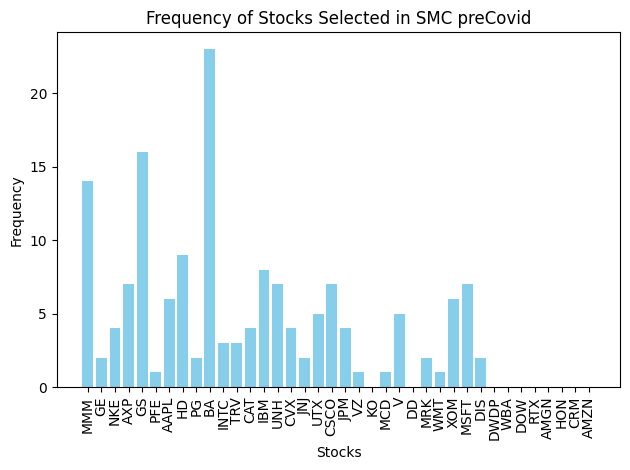

In [73]:
import matplotlib.pyplot as plt
keys = list(stockSelectionFrequency['preCovid'].keys())
values = list(stockSelectionFrequency['preCovid'].values())


plt.bar(keys, values, color='skyblue')
plt.title('Frequency of Stocks Selected in SMC preCovid')
plt.xlabel('Stocks')
plt.ylabel('Frequency')

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

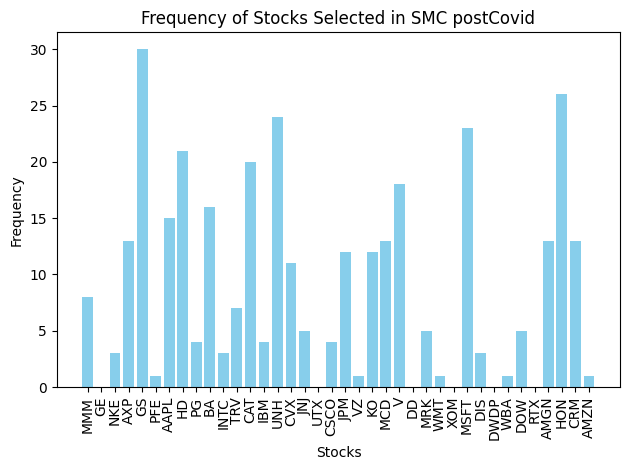

In [74]:
keys = list(stockSelectionFrequency['postCovid'].keys())
values = list(stockSelectionFrequency['postCovid'].values())


plt.bar(keys, values, color='skyblue')
plt.title('Frequency of Stocks Selected in SMC postCovid')
plt.xlabel('Stocks')
plt.ylabel('Frequency')

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

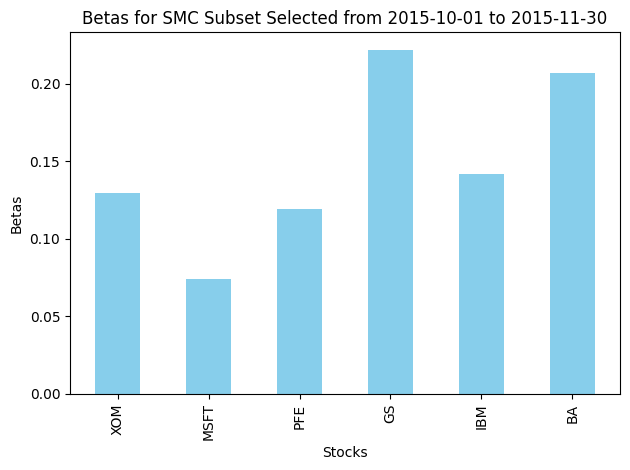

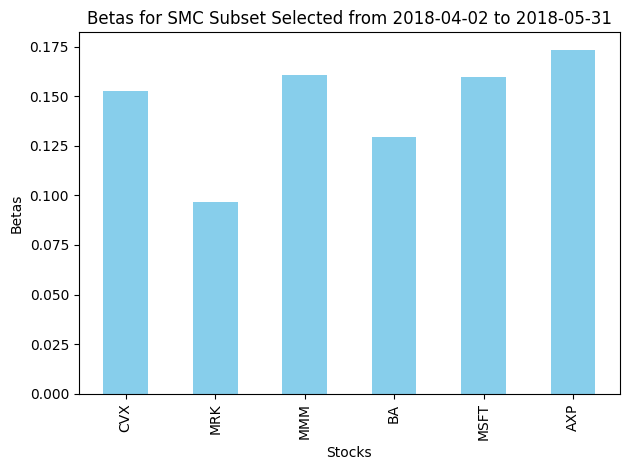

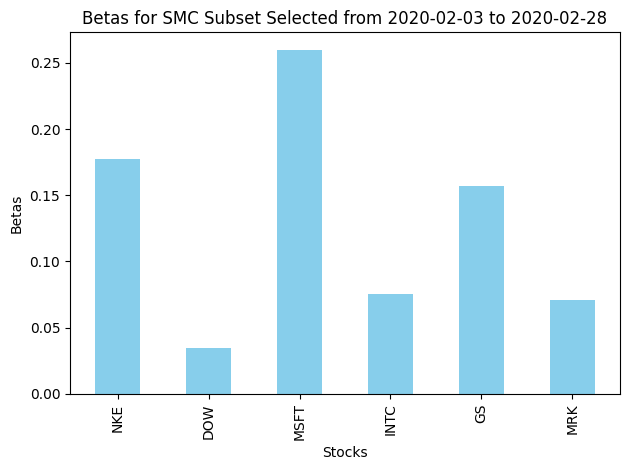

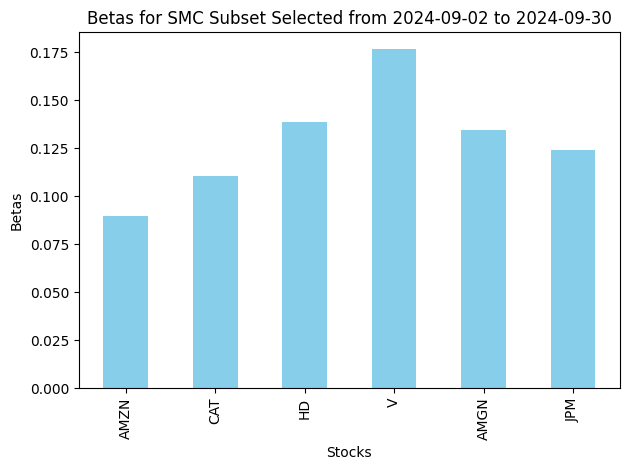

In [76]:
relevantPeriods = [(datetime.date(2015, 10, 1), datetime.date(2015, 11, 30)),
                    (datetime.date(2018, 4, 2), datetime.date(2018, 5, 31)),
                     (datetime.date(2020, 2, 3), datetime.date(2020,2,28)),
                    (datetime.date(2024, 9, 2), datetime.date(2024,9,30))]


for rollPeriod in relevantPeriods:
  rollInfo = rollPeriodInfoDict[rollPeriod]
  betaLasso = rollInfo['betaSmc']
  betaLassoStocks = {}
  commonStockVariableMapping = rollInfo['commonStockVariableMapping']
  for var in betaLasso:
    betaLassoStocks[ commonStockVariableMapping[var] ] = betaLasso[var]

  stocks =  list(betaLassoStocks.keys())
  betas = list(betaLassoStocks.values())
  plt.bar(stocks, betas, color='skyblue', width = 0.5)
  plt.title('Betas for SMC Subset Selected from {} to {}'.format(rollPeriod[0], rollPeriod[1]))
  plt.xlabel('Stocks')
  plt.ylabel('Betas')

  # Show the plot
  plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
  plt.tight_layout()  # Adjust layout to make room for rotated labels
  plt.show()

In [82]:
## varying number of stocks and comparing tracking error
rollPeriodInfoDict = generateRollPeriodInfoDict( df )
numStocks = [8,10,12,14,16,18]


In [ ]:
for n in numStocks:
  print( 'Running Simulations for numStocks:', n)

  for rollPeriod, rollInfo in rollPeriodInfoDict.items():
    print(rollPeriod)
    rebalDates = generateRebalDates( DJI, rollInfo['start'], rollInfo['end'] )
    rollPeriodInfoDict[ rollPeriod ]['rebalDates'] = rebalDates
    commonStocks, diffStocksDict, commonStockVariableMapping =  generateComposition( DJI, rebalDates, rollInfo['start'], rollInfo['end'])
    rollPeriodInfoDict[ rollPeriod ]['commonStocks'] = commonStocks
    rollPeriodInfoDict[ rollPeriod ]['diffStocksDict'] = diffStocksDict
    rollPeriodInfoDict[ rollPeriod ]['commonStockVariableMapping'] = commonStockVariableMapping
    rollPeriodInfoDict[ rollPeriod ]['df'] = generateDataFrame( df, rollPeriod, rollInfo, 'DJI')
    initDf =  rollPeriodInfoDict[ rollPeriod ]['df']
    initDf = initDf.dropna(axis=1)
    returns = initDf.pct_change(1) * 100
    returns = returns.dropna()
    numRegressor = n
    numOfParticles = 100
    maxStepSize = 0.05
    cumAccRate = 5
    minStepSize = 0.01
    useSeed = True
    seed = 1
    eta = 1
    fitIntercept = True
    KFoldup = False
    subset, X, y = selectSubset( numRegressor, returns, numOfParticles, maxStepSize, cumAccRate, minStepSize=0.01, useSeed=True,
                    seed=1, eta=1, fitIntercept=True, KFoldDup=False )
    subset = list(subset)
    betaSmc = linearRegBeta(subset, X, y)
    baseIndexLevels, smcIndexLevels, trackingError = getTrackingError( rollPeriod, rollInfo, subset, betaSmc )
    rollInfo['betaSmc'] = betaSmc
    rollInfo['smcIndexLevels'] = smcIndexLevels
    rollInfo['baseIndexLevels'] = baseIndexLevels
    rollInfo['trackingError'] = trackingError

  preCovidTrackingError = []
  postCovidTrackingError = []

  for rollPeriod, rollInfo in rollPeriodInfoDict.items():
    if rollInfo['period'] == 'preCovid':
      preCovidTrackingError.append( rollInfo['trackingError'])
    else:
      postCovidTrackingError.append( rollInfo['trackingError'])

  print( 'PreCovid Tracking Error:', sum(preCovidTrackingError)/len(preCovidTrackingError))
  print( 'PostCovid Tracking Error:', sum(postCovidTrackingError)/len(postCovidTrackingError))

Running Simulations for numStocks: 8
(datetime.date(2015, 10, 1), datetime.date(2015, 11, 30))
(datetime.date(2015, 12, 1), datetime.date(2016, 1, 29))
(datetime.date(2016, 2, 1), datetime.date(2016, 3, 31))
(datetime.date(2016, 4, 1), datetime.date(2016, 5, 31))
(datetime.date(2016, 6, 1), datetime.date(2016, 7, 29))
(datetime.date(2016, 8, 1), datetime.date(2016, 9, 30))
(datetime.date(2016, 10, 3), datetime.date(2016, 11, 30))
(datetime.date(2016, 12, 1), datetime.date(2017, 1, 31))
(datetime.date(2017, 2, 1), datetime.date(2017, 3, 31))
(datetime.date(2017, 4, 3), datetime.date(2017, 5, 31))
(datetime.date(2017, 6, 1), datetime.date(2017, 7, 31))
(datetime.date(2017, 8, 1), datetime.date(2017, 9, 29))
(datetime.date(2017, 10, 2), datetime.date(2017, 11, 30))
(datetime.date(2017, 12, 1), datetime.date(2018, 1, 31))
(datetime.date(2018, 2, 1), datetime.date(2018, 3, 30))
(datetime.date(2018, 4, 2), datetime.date(2018, 5, 31))
(datetime.date(2018, 6, 1), datetime.date(2018, 7, 31))
(d

In [ ]:
initDf = rollPeriodInfoDict[(datetime.date(2018, 8, 1), datetime.date(2018, 9, 28))]['df']

initDf = initDf.dropna(axis=1)
returns = initDf.pct_change(1) * 100
returns = returns.dropna()
##X = returns[['x'+str(i) for i in range(1,returns.shape[1])]]
##y = returns['y']

numRegressor = 6
df = returns
numOfParticles = 100
maxStepSize = 0.05
cumAccRate = 5
minStepSize = 0.01
useSeed = True
seed = 1
eta = 1
fitIntercept = True
KFoldup = False

subSet, X, y  = selectSubset( numRegressor, df, numOfParticles, maxStepSize, cumAccRate, minStepSize=0.01, useSeed=True, seed=1, eta=1, fitIntercept=True, KFoldDup=False )
#run_simulation( numRegressor=6, df=returns, numOfParticles=100, max_stepSize = 0.05, cumAccRate=5, min_stepSize=0.01, use_seed=True,
                   #seed=1, eta=1, fit_intercept=True, KFoldDup=False )